In [1]:
#!pip install mediapipe opencv-python

ERROR: Could not find a version that satisfies the requirement mediapipe (from versions: none)
ERROR: No matching distribution found for mediapipe


In [2]:
#python --version

NameError: name 'python' is not defined

In [3]:
import sys
print(sys.executable)
!{sys.executable} -m pip --version

/opt/anaconda3/bin/python
pip 22.2.2 from /opt/anaconda3/lib/python3.9/site-packages/pip (python 3.9)


In [4]:
!{sys.executable} -m pip install --upgrade pip

  Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2


In [5]:
!{sys.executable} -m pip install mediapipe opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 667.6/667.6 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13/13 [mediapipe]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depe

I0000 00:00:1751635962.824206  379213 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-23.0.26), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine (1x6x8 (fused) LP
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1751635963.469889  385501 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751635963.565728  385501 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751635963.638497  385501 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


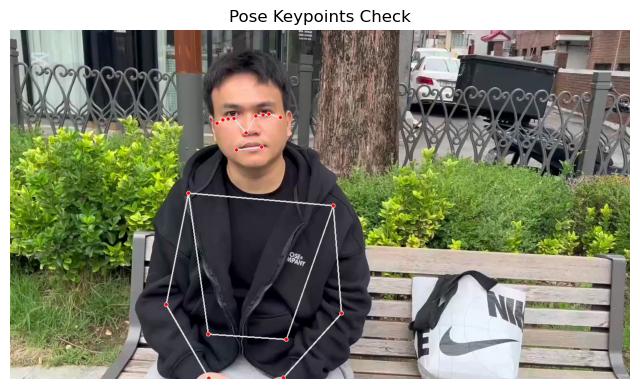

✅ Overlay saved to checked_overlay.png

✅ Extracted 15 Upper Body Keypoints:
nose: x=487, y=212
left_eye_inner: x=507, y=177
left_eye: x=522, y=175
left_eye_outer: x=534, y=173
right_eye_inner: x=462, y=182
right_eye: x=450, y=183
right_eye_outer: x=439, y=185
left_ear: x=558, y=180
right_ear: x=427, y=192
left_shoulder: x=519, y=241
right_shoulder: x=467, y=247
left_elbow: x=667, y=362
right_elbow: x=368, y=336
left_wrist: x=684, y=584
right_wrist: x=322, y=566

✅ Saved keypoints to 01_01_interview_labelling.json


In [6]:
import cv2
import mediapipe as mp
import json
from matplotlib import pyplot as plt

# ---------- SETUP ----------
image_path = "01_01_processed_001.png"  # your current frame file
output_overlay_path = "checked_overlay.png"

# ---------- Initialize MediaPipe Pose ----------
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=1)
mp_drawing = mp.solutions.drawing_utils

# ---------- Load Image ----------
img = cv2.imread(image_path)
if img is None:
    print(f"❌ Cannot load image at {image_path}. Check the path.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ---------- Run Pose Estimation ----------
    result = pose.process(img_rgb)

    # ---------- Check if keypoints are detected ----------
    if result.pose_landmarks:
        # Draw landmarks for visual confirmation
        annotated_img = img.copy()
        mp_drawing.draw_landmarks(
            annotated_img,
            result.pose_landmarks,
            mp_pose.POSE_CONNECTIONS
        )

        # Show using matplotlib (better for Jupyter/VS Code)
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
        plt.title("Pose Keypoints Check")
        plt.axis('off')
        plt.show()

        # Save overlay image
        cv2.imwrite(output_overlay_path, annotated_img)
        print(f"✅ Overlay saved to {output_overlay_path}")

        # Extract 15 upper body keypoints
        keypoint_names = [
            "nose", "left_eye_inner", "left_eye", "left_eye_outer",
            "right_eye_inner", "right_eye", "right_eye_outer",
            "left_ear", "right_ear", "left_shoulder", "right_shoulder",
            "left_elbow", "right_elbow", "left_wrist", "right_wrist"
        ]

        extracted_keypoints = {}
        for idx, name in enumerate(keypoint_names):
            lm = result.pose_landmarks.landmark[idx]
            extracted_keypoints[name] = {
                "x": int(lm.x * img.shape[1]),
                "y": int(lm.y * img.shape[0])
            }

        # Display extracted keypoints
        print("\n✅ Extracted 15 Upper Body Keypoints:")
        for k, v in extracted_keypoints.items():
            print(f"{k}: x={v['x']}, y={v['y']}")

        # Save to JSON
        label_json = {
            "trainee": "01",
            "id": "01",
            "frame": "001",
            "key_points": extracted_keypoints,
            "emotion": ""  # fill manually later
        }
        with open("01_01_interview_labelling.json", "w", encoding="utf-8") as f:
            json.dump(label_json, f, indent=4, ensure_ascii=False)
        print("\n✅ Saved keypoints to 01_01_interview_labelling.json")

    else:
        print("❌ No keypoints detected. Check image quality and visibility of the upper body in the frame.")


I0000 00:00:1751636367.913030  379213 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-23.0.26), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine (1x6x8 (fused) LP
W0000 00:00:1751636368.236758  391362 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751636368.321494  391364 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


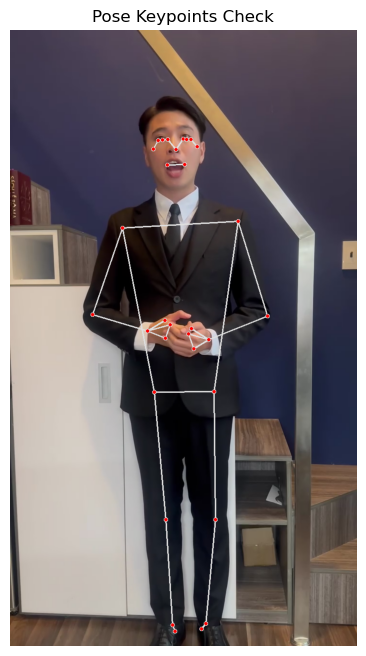

✅ Overlay saved to checked_overlay_003.png

✅ Extracted 15 Upper Body Keypoints:
nose: x=344, y=248
left_eye_inner: x=359, y=226
left_eye: x=366, y=227
left_eye_outer: x=375, y=227
right_eye_inner: x=327, y=227
right_eye: x=316, y=228
right_eye_outer: x=307, y=229
left_ear: x=388, y=242
right_ear: x=297, y=247
left_shoulder: x=362, y=279
right_shoulder: x=326, y=280
left_elbow: x=473, y=397
right_elbow: x=233, y=411
left_wrist: x=534, y=594
right_wrist: x=171, y=591

✅ Saved keypoints to 01_01_interview_labelling.json


In [8]:
import cv2
import mediapipe as mp
import json
from matplotlib import pyplot as plt

# ---------- SETUP ----------
image_path = "01_05_processed_003.png"  # your current frame file
output_overlay_path = "checked_overlay_003.png"

# ---------- Initialize MediaPipe Pose ----------
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=1)
mp_drawing = mp.solutions.drawing_utils

# ---------- Load Image ----------
img = cv2.imread(image_path)
if img is None:
    print(f"❌ Cannot load image at {image_path}. Check the path.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ---------- Run Pose Estimation ----------
    result = pose.process(img_rgb)

    # ---------- Check if keypoints are detected ----------
    if result.pose_landmarks:
        # Draw landmarks for visual confirmation
        annotated_img = img.copy()
        mp_drawing.draw_landmarks(
            annotated_img,
            result.pose_landmarks,
            mp_pose.POSE_CONNECTIONS
        )

        # Show using matplotlib (better for Jupyter/VS Code)
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
        plt.title("Pose Keypoints Check")
        plt.axis('off')
        plt.show()

        # Save overlay image
        cv2.imwrite(output_overlay_path, annotated_img)
        print(f"✅ Overlay saved to {output_overlay_path}")

        # Extract 15 upper body keypoints
        keypoint_names = [
            "nose", "left_eye_inner", "left_eye", "left_eye_outer",
            "right_eye_inner", "right_eye", "right_eye_outer",
            "left_ear", "right_ear", "left_shoulder", "right_shoulder",
            "left_elbow", "right_elbow", "left_wrist", "right_wrist"
        ]

        extracted_keypoints = {}
        for idx, name in enumerate(keypoint_names):
            lm = result.pose_landmarks.landmark[idx]
            extracted_keypoints[name] = {
                "x": int(lm.x * img.shape[1]),
                "y": int(lm.y * img.shape[0])
            }

        # Display extracted keypoints
        print("\n✅ Extracted 15 Upper Body Keypoints:")
        for k, v in extracted_keypoints.items():
            print(f"{k}: x={v['x']}, y={v['y']}")

        # Save to JSON
        label_json = {
            "trainee": "01",
            "id": "01",
            "frame": "001",
            "key_points": extracted_keypoints,
            "emotion": ""  # fill manually later
        }
        with open("01_05_interview_labelling.json", "w", encoding="utf-8") as f:
            json.dump(label_json, f, indent=4, ensure_ascii=False)
        print("\n✅ Saved keypoints to 01_01_interview_labelling.json")

    else:
        print("❌ No keypoints detected. Check image quality and visibility of the upper body in the frame.")


I0000 00:00:1751636607.613704  379213 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-23.0.26), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine (1x6x8 (fused) LP
W0000 00:00:1751636607.940303  395036 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751636608.036068  395036 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


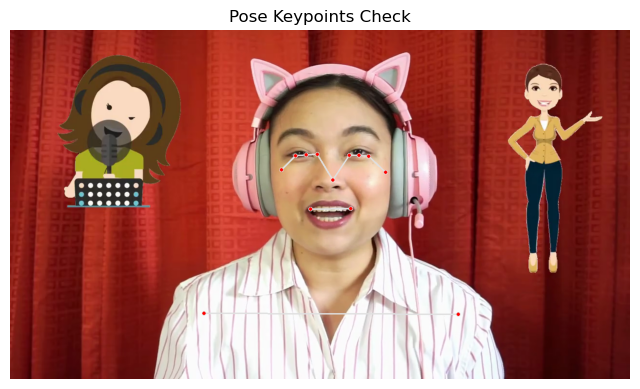

✅ Overlay saved to checked_overlay_007.png

✅ Extracted 15 Upper Body Keypoints:
nose: x=666, y=309
left_eye_inner: x=700, y=258
left_eye: x=720, y=258
left_eye_outer: x=740, y=260
right_eye_inner: x=634, y=256
right_eye: x=611, y=257
right_eye_outer: x=589, y=259
left_ear: x=775, y=293
right_ear: x=560, y=288
left_shoulder: x=703, y=368
right_shoulder: x=620, y=369
left_elbow: x=925, y=586
right_elbow: x=400, y=584
left_wrist: x=987, y=942
right_wrist: x=325, y=925

✅ Saved keypoints to 01_01_interview_labelling.json


In [9]:
import cv2
import mediapipe as mp
import json
from matplotlib import pyplot as plt

# ---------- SETUP ----------
image_path = "6_10_processed_007.png"  # your current frame file
output_overlay_path = "checked_overlay_007.png"

# ---------- Initialize MediaPipe Pose ----------
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=1)
mp_drawing = mp.solutions.drawing_utils

# ---------- Load Image ----------
img = cv2.imread(image_path)
if img is None:
    print(f"❌ Cannot load image at {image_path}. Check the path.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ---------- Run Pose Estimation ----------
    result = pose.process(img_rgb)

    # ---------- Check if keypoints are detected ----------
    if result.pose_landmarks:
        # Draw landmarks for visual confirmation
        annotated_img = img.copy()
        mp_drawing.draw_landmarks(
            annotated_img,
            result.pose_landmarks,
            mp_pose.POSE_CONNECTIONS
        )

        # Show using matplotlib (better for Jupyter/VS Code)
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
        plt.title("Pose Keypoints Check")
        plt.axis('off')
        plt.show()

        # Save overlay image
        cv2.imwrite(output_overlay_path, annotated_img)
        print(f"✅ Overlay saved to {output_overlay_path}")

        # Extract 15 upper body keypoints
        keypoint_names = [
            "nose", "left_eye_inner", "left_eye", "left_eye_outer",
            "right_eye_inner", "right_eye", "right_eye_outer",
            "left_ear", "right_ear", "left_shoulder", "right_shoulder",
            "left_elbow", "right_elbow", "left_wrist", "right_wrist"
        ]

        extracted_keypoints = {}
        for idx, name in enumerate(keypoint_names):
            lm = result.pose_landmarks.landmark[idx]
            extracted_keypoints[name] = {
                "x": int(lm.x * img.shape[1]),
                "y": int(lm.y * img.shape[0])
            }

        # Display extracted keypoints
        print("\n✅ Extracted 15 Upper Body Keypoints:")
        for k, v in extracted_keypoints.items():
            print(f"{k}: x={v['x']}, y={v['y']}")

        # Save to JSON
        label_json = {
            "trainee": "01",
            "id": "01",
            "frame": "001",
            "key_points": extracted_keypoints,
            "emotion": ""  # fill manually later
        }
        with open("06_10_interview_labelling.json", "w", encoding="utf-8") as f:
            json.dump(label_json, f, indent=4, ensure_ascii=False)
        print("\n✅ Saved keypoints to 01_01_interview_labelling.json")

    else:
        print("❌ No keypoints detected. Check image quality and visibility of the upper body in the frame.")


In [10]:
import cv2
import mediapipe as mp
import json
import os
from tqdm import tqdm

# ---------- SETTINGS ----------
input_folder = "processed_frames"
output_json_folder = "labelled_json"

os.makedirs(output_json_folder, exist_ok=True)

# ---------- Initialize MediaPipe ----------
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=1)

# ---------- List all PNG files ----------
image_files = [f for f in os.listdir(input_folder) if f.endswith(".png")]

# ---------- Process Each File ----------
for file in tqdm(image_files, desc="Processing frames"):
    file_path = os.path.join(input_folder, file)

    # Parse trainee, id, frame from filename
    try:
        trainee, id_, _, frame_ext = file.split("_")
        frame = frame_ext.split(".")[0]
    except:
        print(f"⚠️ Skipped file due to unexpected name format: {file}")
        continue

    img = cv2.imread(file_path)
    if img is None:
        print(f"❌ Cannot load {file}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = pose.process(img_rgb)

    if result.pose_landmarks:
        h, w, _ = img.shape

        # Extract 15 upper body keypoints
        keypoint_names = [
            "nose", "left_eye_inner", "left_eye", "left_eye_outer",
            "right_eye_inner", "right_eye", "right_eye_outer",
            "left_ear", "right_ear", "left_shoulder", "right_shoulder",
            "left_elbow", "right_elbow", "left_wrist", "right_wrist"
        ]

        extracted_keypoints = {}
        for idx, name in enumerate(keypoint_names):
            lm = result.pose_landmarks.landmark[idx]
            x_px = int(lm.x * w)
            y_px = int(lm.y * h)
            extracted_keypoints[name] = {"x": x_px, "y": y_px}

        # Save JSON
        json_data = {
            "trainee": trainee,
            "id": id_,
            "frame": frame,
            "key_points": extracted_keypoints,
            "emotion": ""  # To be filled later
        }
        json_name = f"{trainee}_{id_}_frame_{frame}.json"
        with open(os.path.join(output_json_folder, json_name), "w", encoding="utf-8") as jf:
            json.dump(json_data, jf, indent=4, ensure_ascii=False)

    else:
        print(f"⚠️ No keypoints detected in {file}. Check image quality.")

print("✅ Batch keypoint extraction completed for all frames. JSON files saved in 'labelled_json'.")


I0000 00:00:1751641347.411920  379213 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-23.0.26), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine (1x6x8 (fused) LP
W0000 00:00:1751641347.717132  460417 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751641348.019031  460417 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Processing frames:  58%|█████▊    | 405/699 [00:40<00:45,  6.49it/s]

⚠️ No keypoints detected in 06_27_processed_015.png. Check image quality.


Processing frames: 100%|██████████| 699/699 [01:10<00:00,  9.96it/s]

✅ Batch keypoint extraction completed for all frames. JSON files saved in 'labelled_json'.


In [13]:
import json
import os

# ---------- SETTINGS ----------
json_folder = "labelled_json"
output_json_file = "all_keypoints_labelled.json"

# ---------- Collect all JSON files ----------
json_files = sorted([f for f in os.listdir(json_folder) if f.endswith(".json")])

# ---------- Container for all data ----------
all_data = []

# ---------- Read and append each JSON file ----------
for file in json_files:
    file_path = os.path.join(json_folder, file)
    with open(file_path, "r", encoding="utf-8") as jf:
        data = json.load(jf)
        # If the individual file is a list, extend
        if isinstance(data, list):
            all_data.extend(data)
        else:
            all_data.append(data)

# ---------- Write combined JSON ----------
with open(output_json_file, "w", encoding="utf-8") as f:
    json.dump(all_data, f, indent=4, ensure_ascii=False)

print(f"✅ Combined {len(json_files)} JSON files into '{output_json_file}'.")

✅ Combined 698 JSON files into 'all_keypoints_labelled.json'.
